In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import numpy as np
# 데이터 로드
data = pd.read_csv('건물별연면적.csv')
data['연면적(㎡)'] = data['연면적(㎡)'].str.replace(',', '').astype(float)
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'  # 한글 폰트의 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)



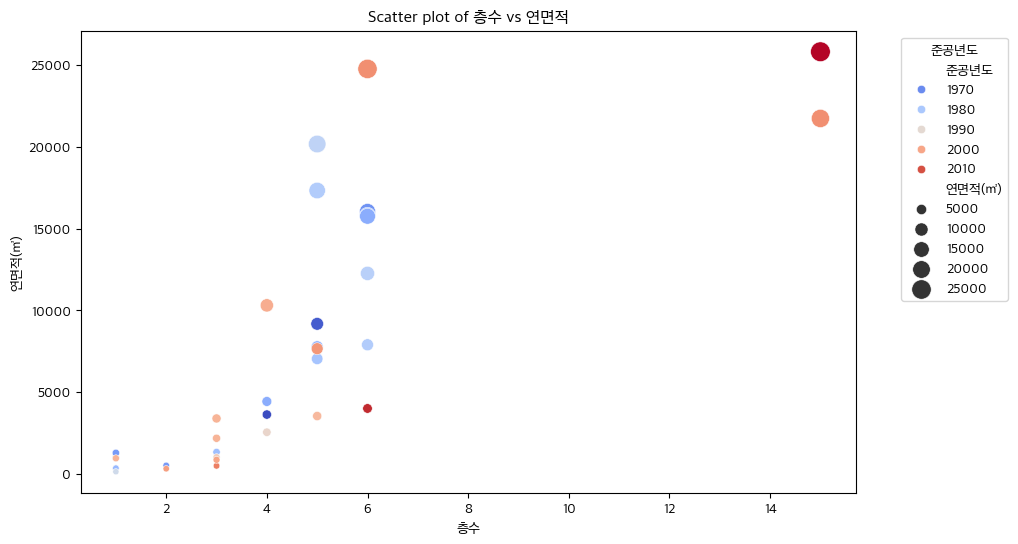

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='층수', y='연면적(㎡)', data=data, hue='준공년도', palette='coolwarm', size='연면적(㎡)', sizes=(20, 200))
plt.title('Scatter plot of 층수 vs 연면적')
plt.xlabel('층수')
plt.ylabel('연면적(㎡)')
plt.legend(title='준공년도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


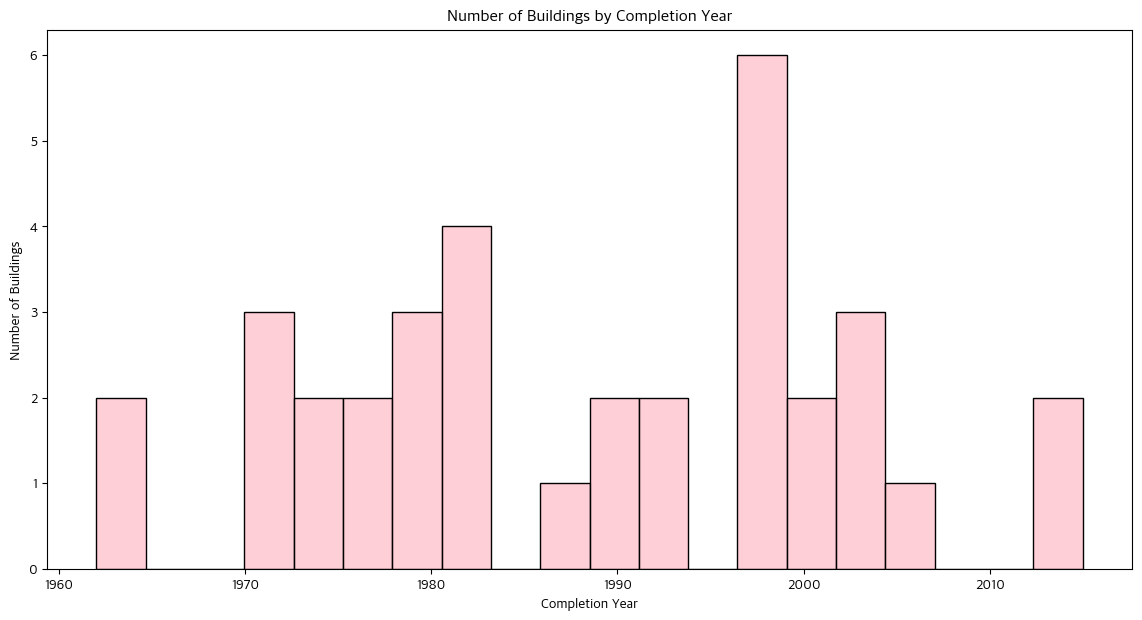

In [17]:
plt.figure(figsize=(14, 7))
sns.histplot(data['준공년도'], bins=20, kde=False, color='pink')
plt.title('Number of Buildings by Completion Year')
plt.xlabel('Completion Year')
plt.ylabel('Number of Buildings')
plt.show()


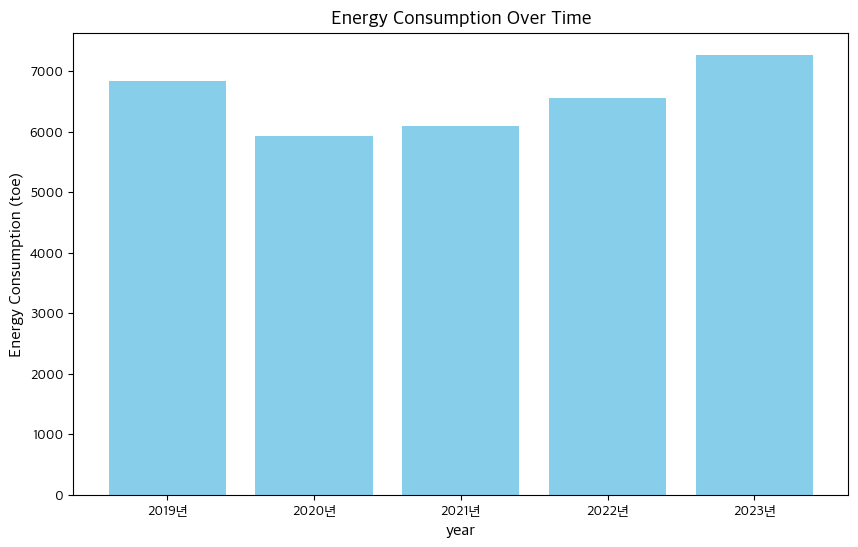

In [13]:
# df['Energy Consumption (toe)'] 읽어와서 , 제거하고 int로 변환
df = pd.read_csv('연별에너지사용량.csv')
df['소비량(toe)'] = df['소비량(toe)'].astype(str).str.replace(',', '', regex=False)
df['소비량(toe)'] = pd.to_numeric(df['소비량(toe)'])
plt.figure(figsize=(10, 6))
plt.bar(list(df['year']), list(map(int, df['소비량(toe)'])), color='skyblue')
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.ylabel('Energy Consumption (toe)', fontsize=12)
plt.show()


        table_name  year  month  전력(kWh)      전기_비용  가스(m^3)      가스_비용
0  연간 월별 에너지 총 소비량  2023      1  2610198  379311820   132075  211575870
1  연간 월별 에너지 총 소비량  2023      2  2173731  331556350   136358  217190654
2  연간 월별 에너지 총 소비량  2023      3  2104639  266966690   110220  166796920
3  연간 월별 에너지 총 소비량  2023      4  1716496  225084230    73785  104965070
4  연간 월별 에너지 총 소비량  2023      5  1939252  258386950    14445   14600940


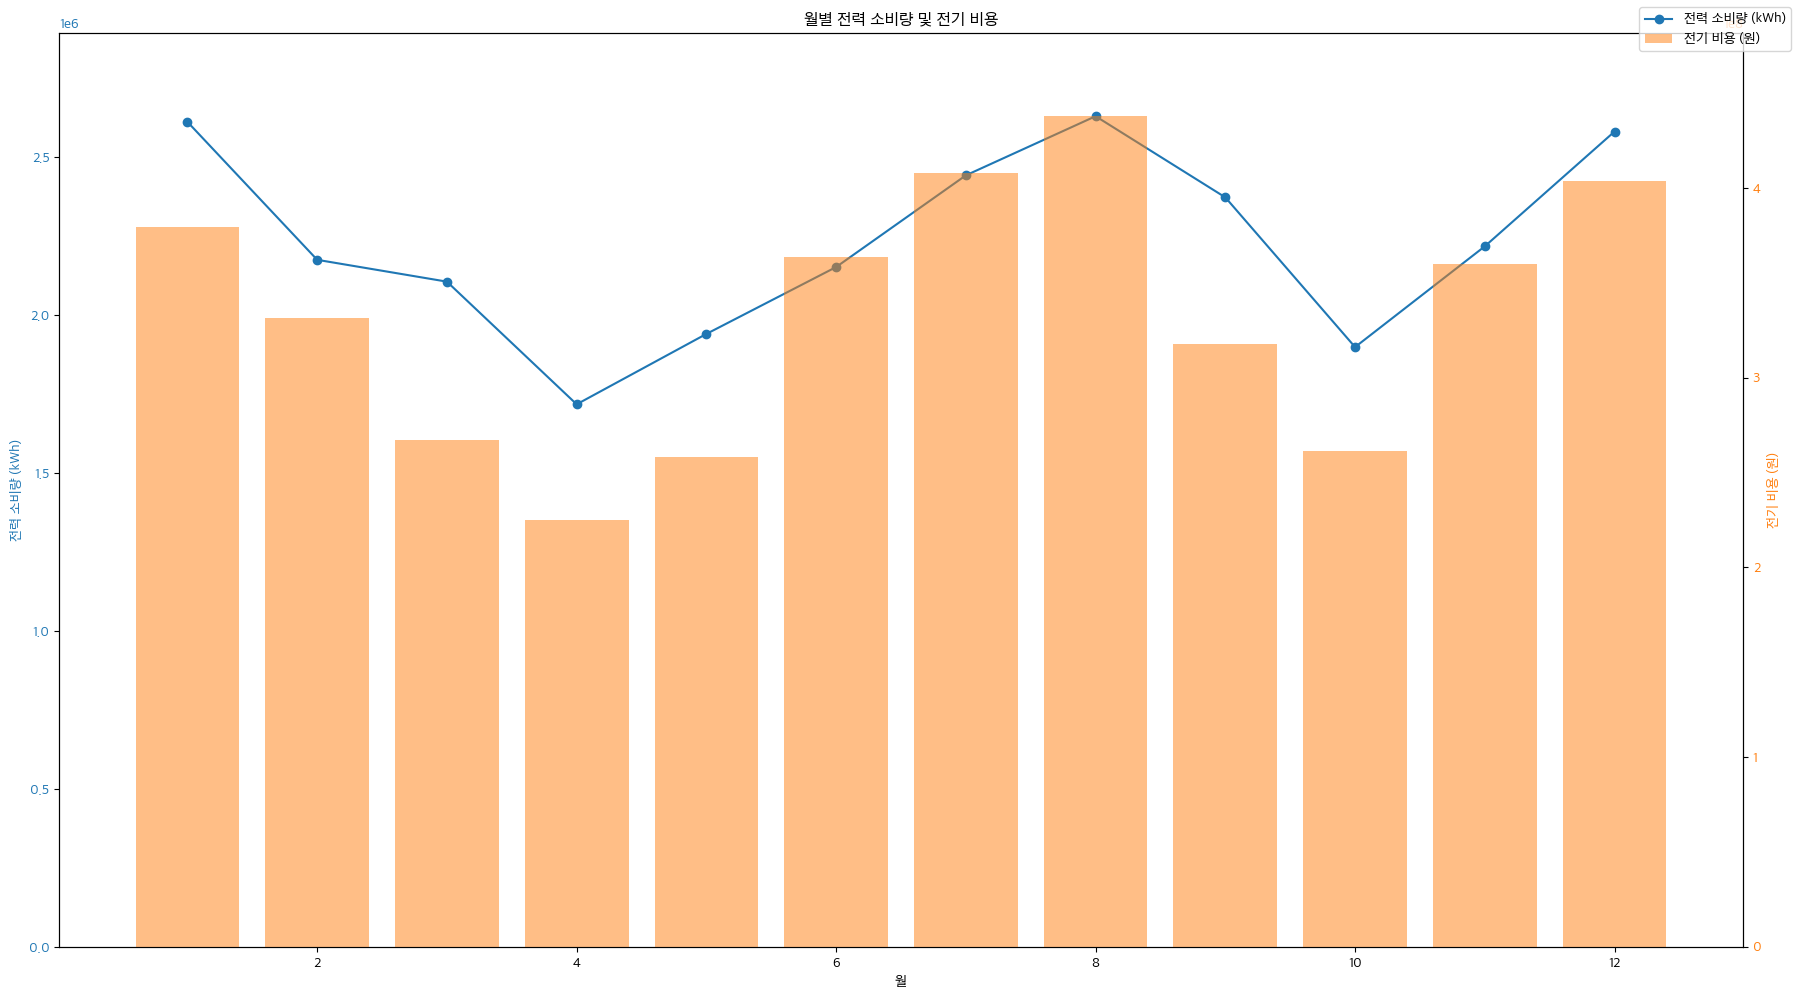

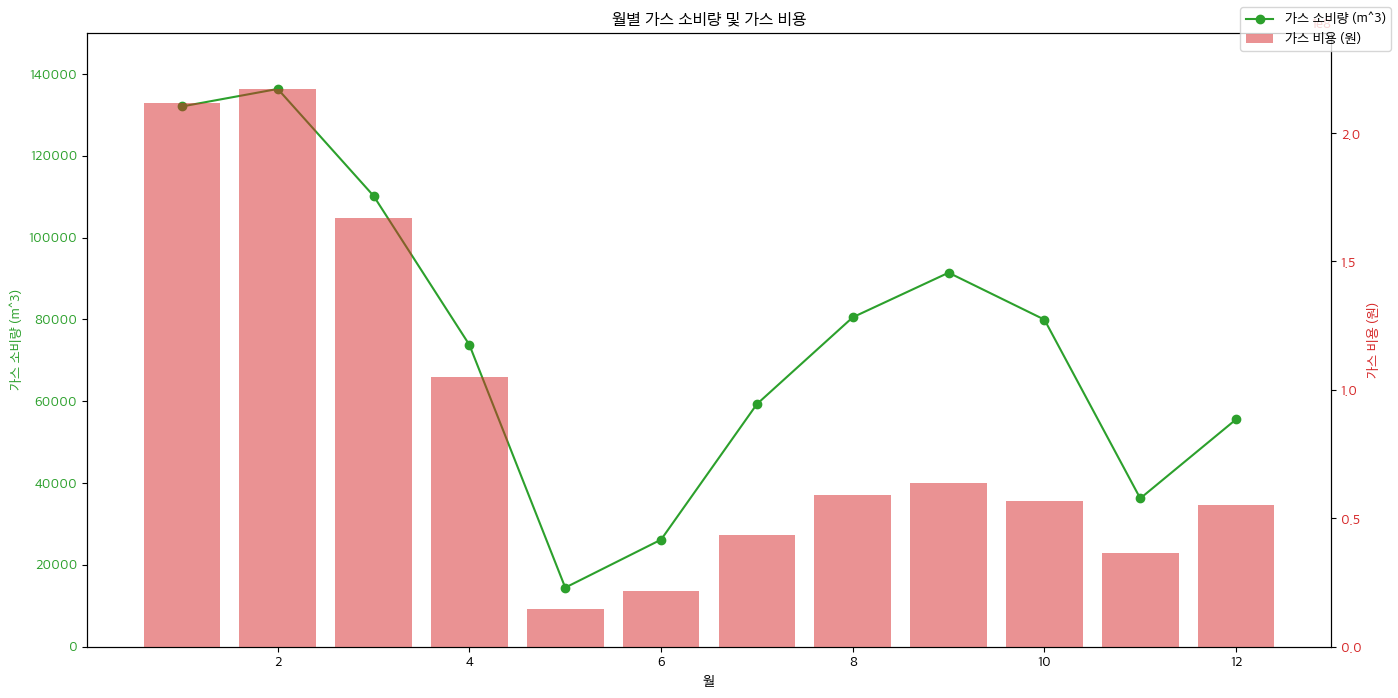

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 데이터를 읽어옵니다.
data = pd.read_csv('2023월별에너지사용량.csv')
# 데이터를 확인합니다.
print(data.head())

# 월별 전력 소비량 및 전기 비용 시각화
fig, ax1 = plt.subplots(figsize=(18, 10))

color = 'tab:blue'
ax1.set_xlabel('월')
ax1.set_ylabel('전력 소비량 (kWh)', color=color)
ax1.plot(data['month'], data['전력(kWh)'].astype(float), color=color, marker='o', linestyle='-', label='전력 소비량 (kWh)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, data['전력(kWh)'].max() * 1.1)

ax2 = ax1.twinx()  # 두 번째 y축
color = 'tab:orange'
ax2.set_ylabel('전기 비용 (원)', color=color)
ax2.bar(data['month'], data['전기_비용'].astype(float), color=color, alpha=0.5, label='전기 비용 (원)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, data['전기_비용'].max() * 1.1)

fig.tight_layout()
plt.title('월별 전력 소비량 및 전기 비용')
fig.legend(loc='upper right')
plt.show()

# 월별 가스 소비량 및 가스 비용 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:green'
ax1.set_xlabel('월')
ax1.set_ylabel('가스 소비량 (m^3)', color=color)
ax1.plot(data['month'], data['가스(m^3)'].astype(float), color=color, marker='o', linestyle='-', label='가스 소비량 (m^3)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, data['가스(m^3)'].max() * 1.1)

ax2 = ax1.twinx()  # 두 번째 y축
color = 'tab:red'
ax2.set_ylabel('가스 비용 (원)', color=color)
ax2.bar(data['month'], data['가스_비용'].astype(float), color=color, alpha=0.5, label='가스 비용 (원)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, data['가스_비용'].max() * 1.1)

fig.tight_layout()
plt.title('월별 가스 소비량 및 가스 비용')
fig.legend(loc='upper right')
plt.show()